In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv(r"C:\Users\varungo\Desktop\forest_fires.csv")

In [20]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# EDA for fire forest

In [21]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [22]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [23]:

df["month"].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [24]:
df["month"]=df["month"].map({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})

In [25]:
df["month"].unique()

array([ 3, 10,  8,  9,  4,  6,  7,  2,  1, 12,  5, 11], dtype=int64)

In [26]:
df["day"].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [27]:
df["day"]=df["day"].map({'fri':6, 'tue':5, 'sat':7, 'sun':1, 'mon':2, 'wed':4, 'thu':3})

In [28]:
df["day"].unique()

array([6, 5, 7, 1, 2, 4, 3], dtype=int64)

In [30]:
df.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [32]:
 for feature in df :
    print(feature,"unique values =",len(df[feature].unique()))

X unique values = 9
Y unique values = 7
month unique values = 12
day unique values = 7
FFMC unique values = 106
DMC unique values = 215
DC unique values = 219
ISI unique values = 119
temp unique values = 192
RH unique values = 75
wind unique values = 21
rain unique values = 7
area unique values = 251


# discrete feature in numeric feature 

In [35]:
data=df.copy()
discrete_numeric=[feature for feature in data.columns if len(data[feature].unique()) <=21 ]
discrete_numeric

['X', 'Y', 'month', 'day', 'wind', 'rain']

# continue feature in numeric feature 

In [36]:
continue_numeric=[feature for feature in data.columns if len(data[feature].unique()) >21 ]
continue_numeric

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

# distribution of continue numeric feature

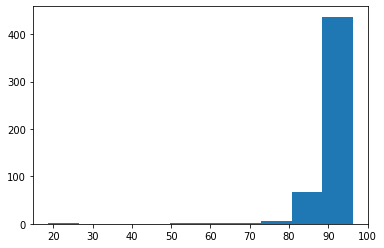

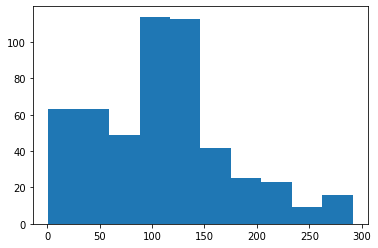

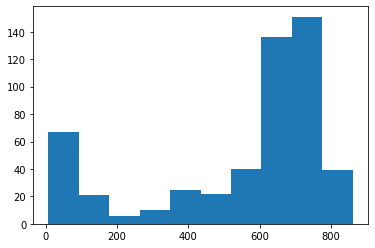

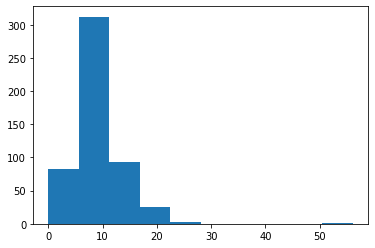

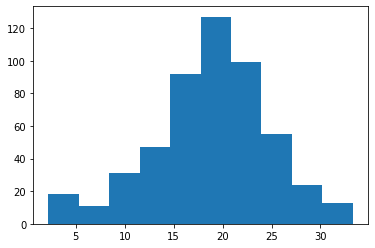

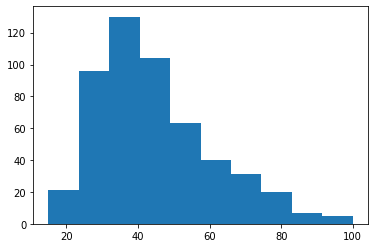

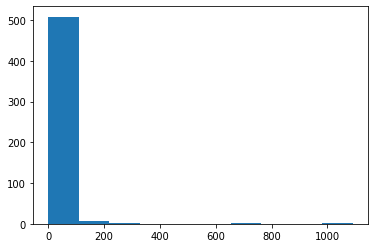

In [38]:
for feature in continue_numeric :
    plt.hist(data[feature])
    plt.show()

# # distribution of discrete numeric feature

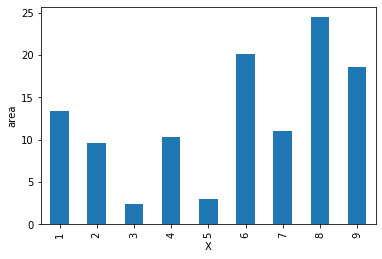

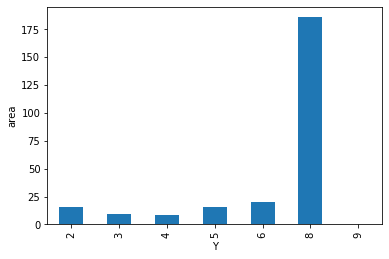

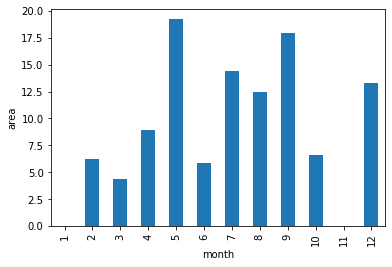

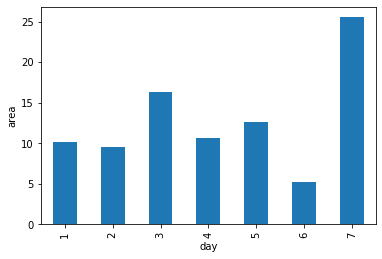

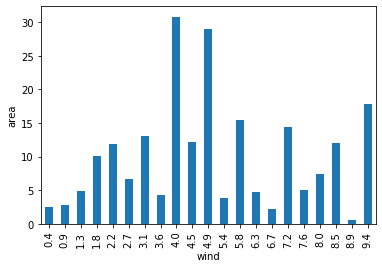

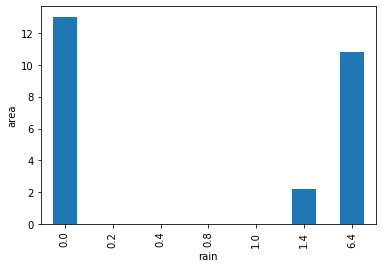

In [43]:
for feature in discrete_numeric :
    data.groupby(feature)["area"].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("area")
    plt.show()

In [44]:
data["rain"].unique()

array([0. , 0.2, 1. , 6.4, 0.8, 0.4, 1.4])

In [46]:
data[data["rain"]==0.2]["area"]

3      0.0
286    0.0
Name: area, dtype: float64

# realtion between dependent and independent feature

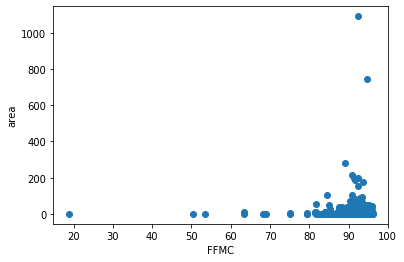

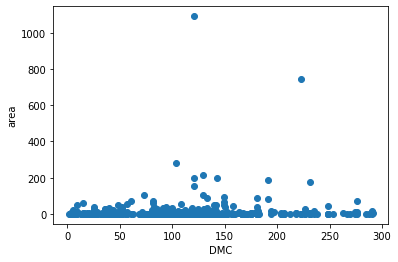

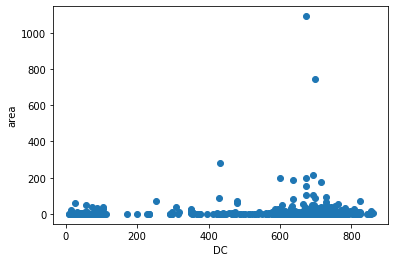

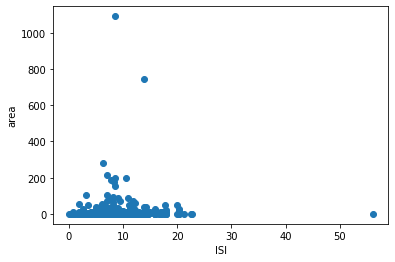

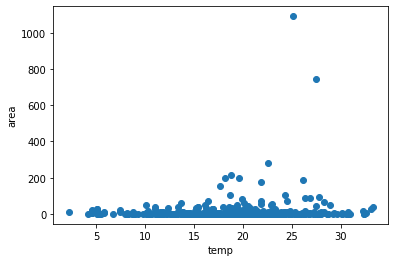

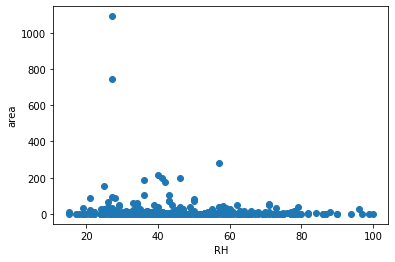

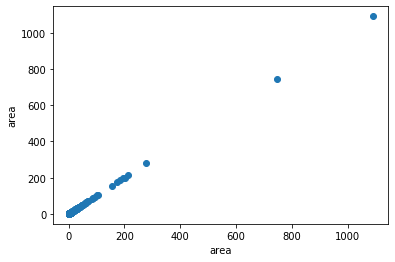

In [48]:
for feature in continue_numeric :
    plt.scatter(data[feature],data["area"])
    plt.xlabel(feature)
    plt.ylabel("area")
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D24244D88>,
      dtype=object)

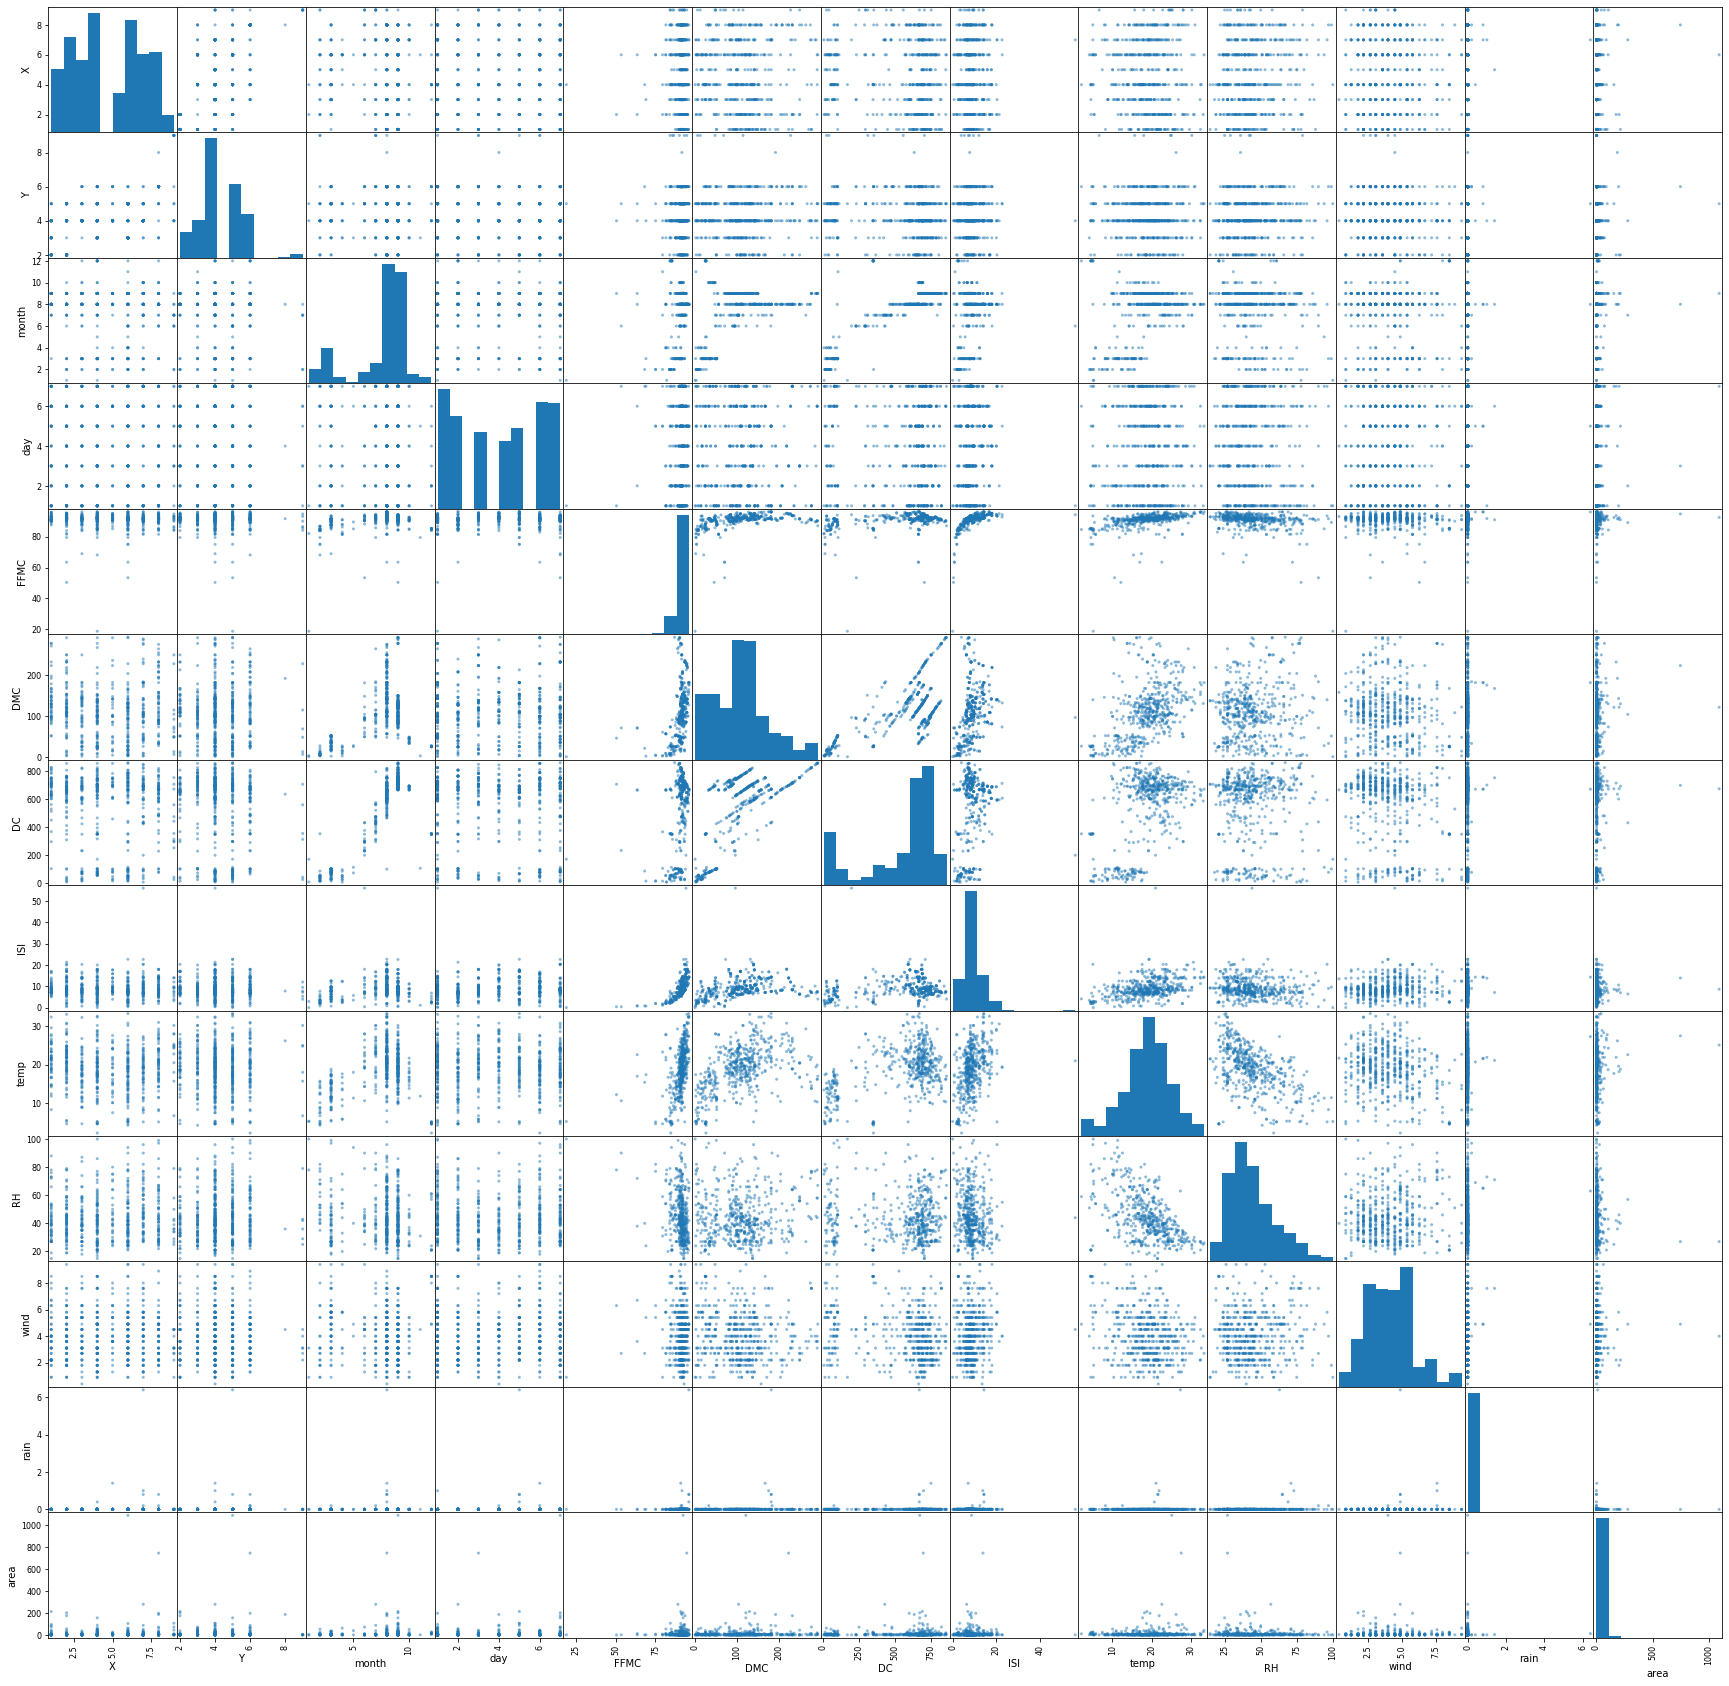

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(30,30))

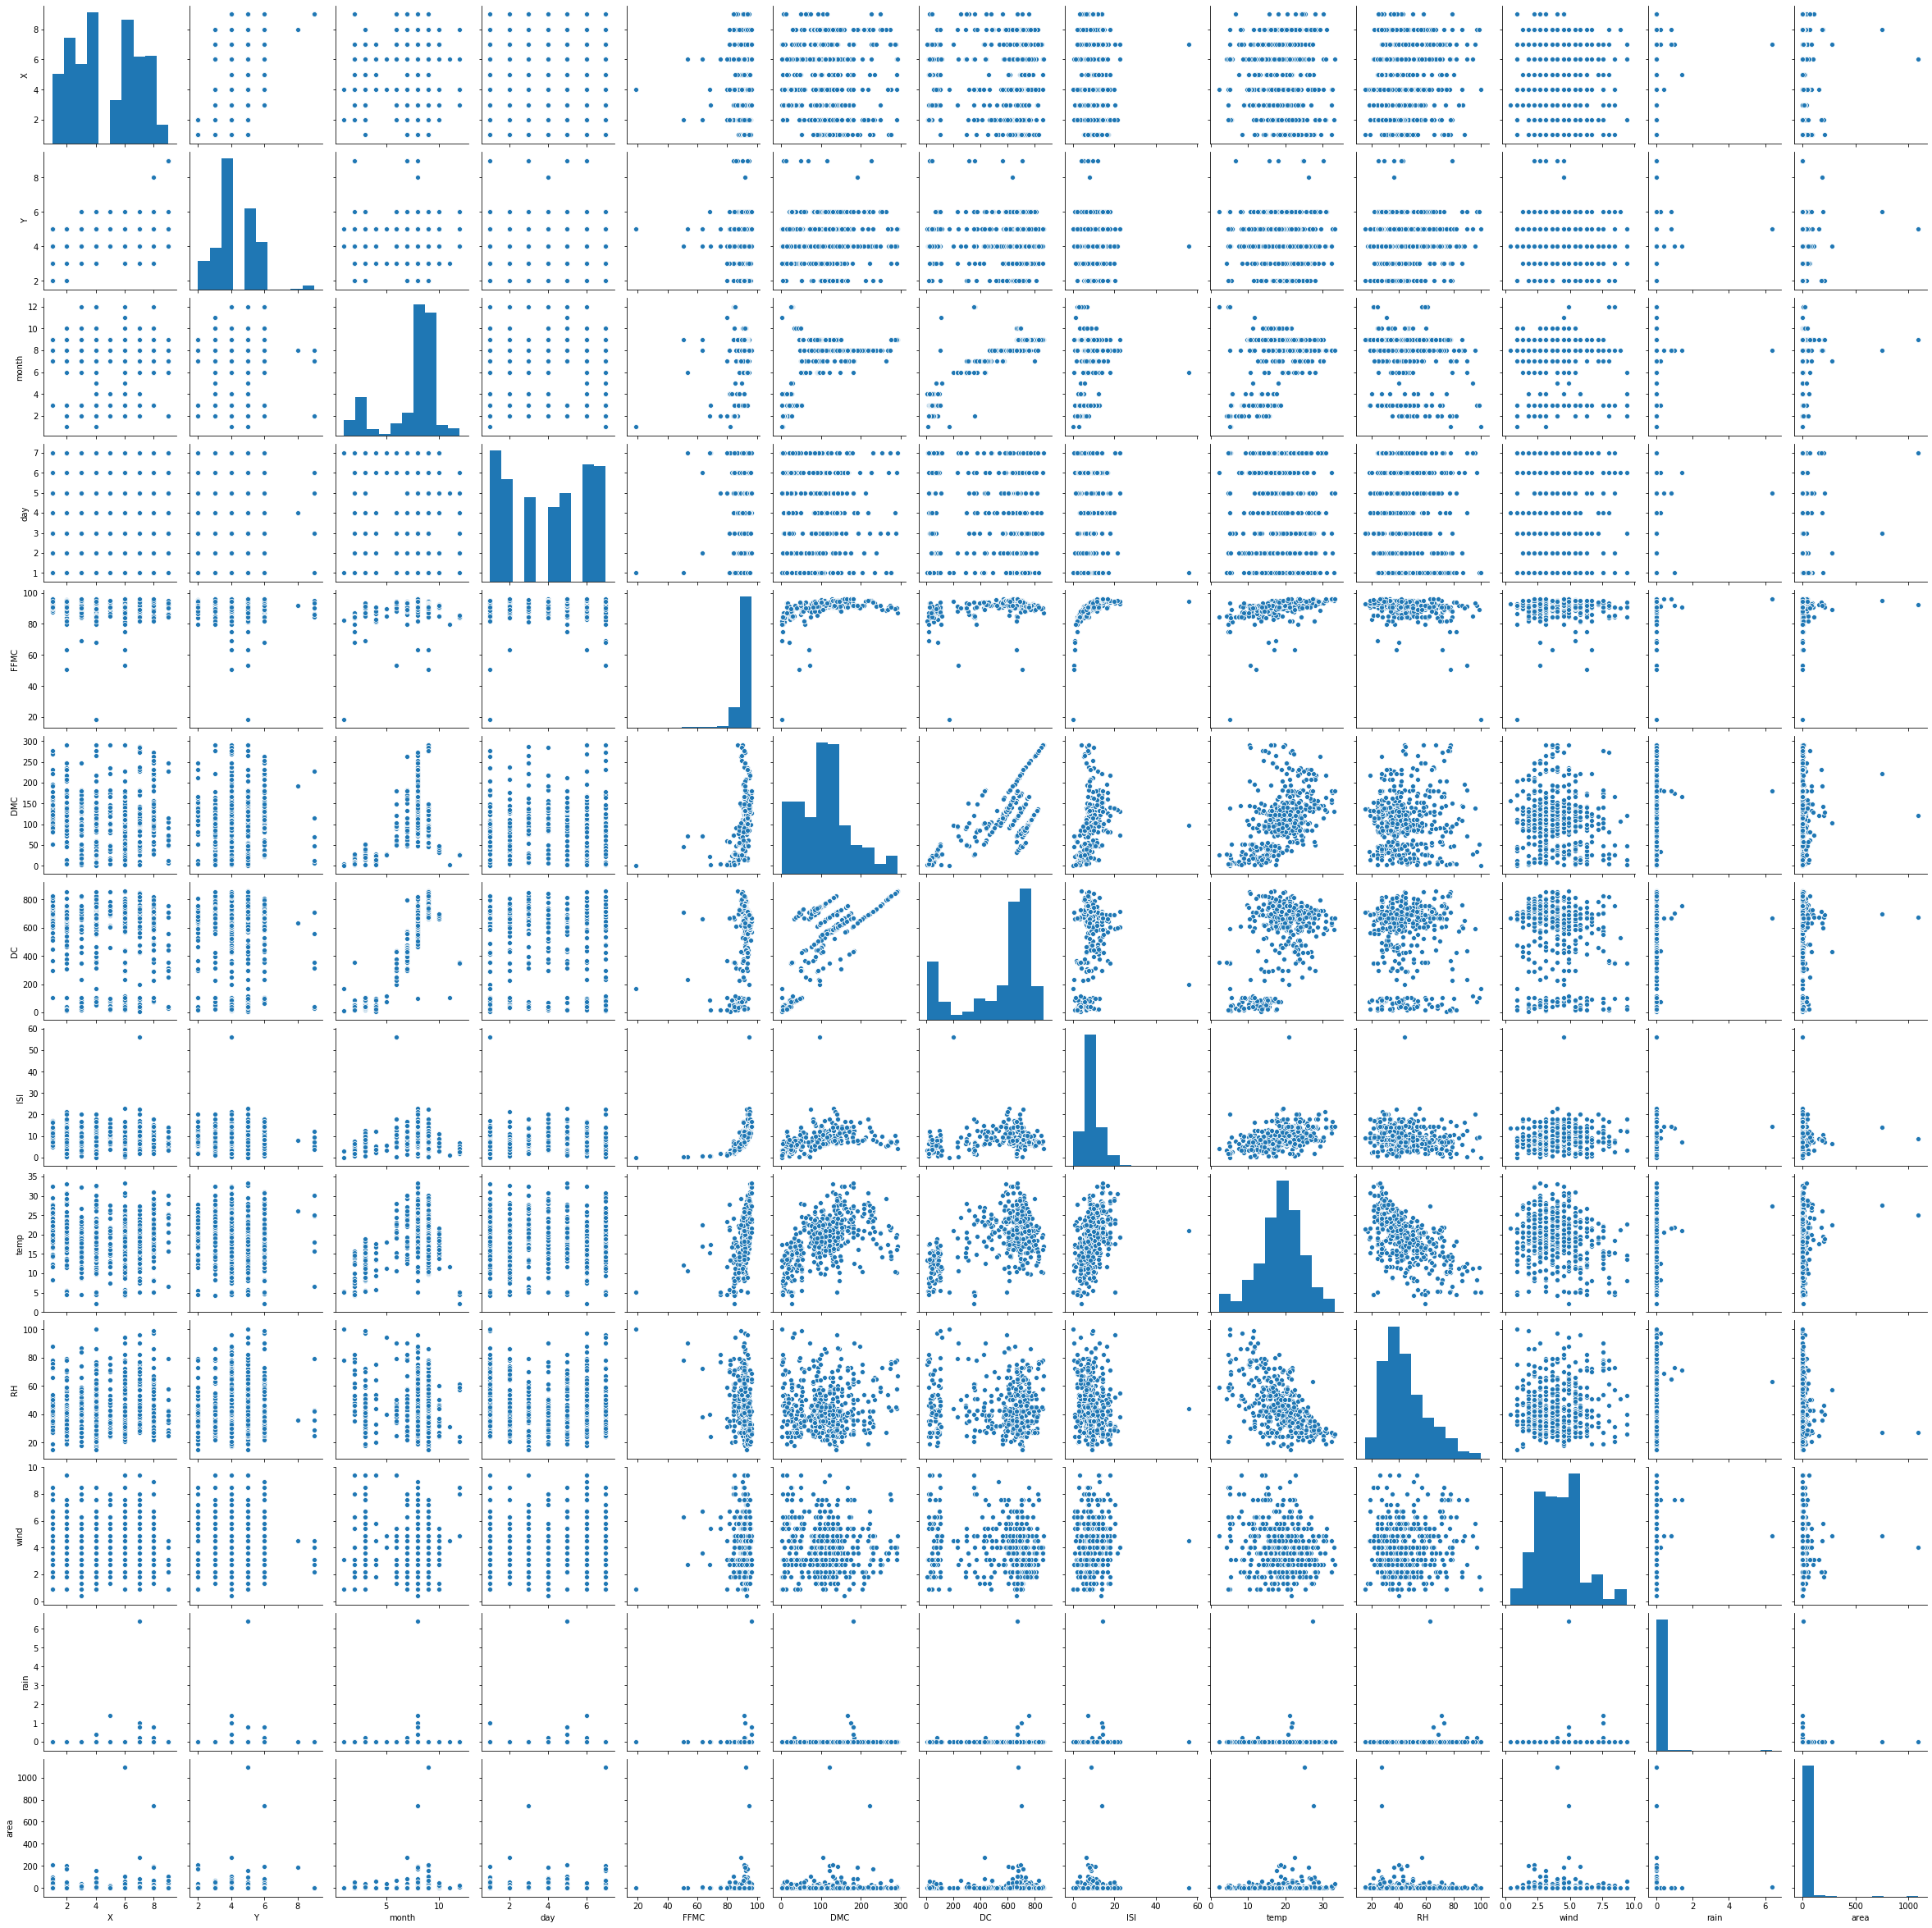

In [52]:
sns.pairplot(data)

# outlier

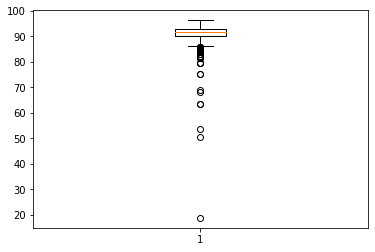

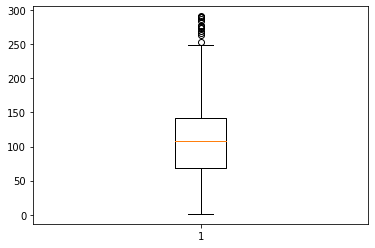

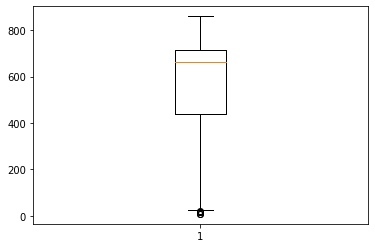

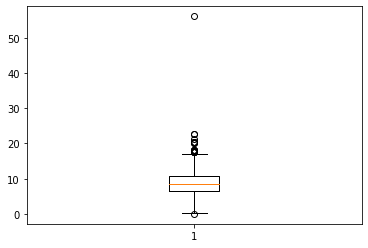

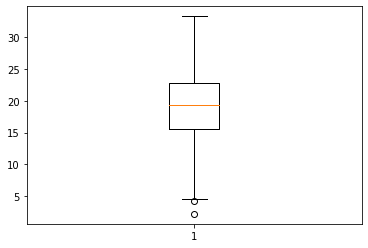

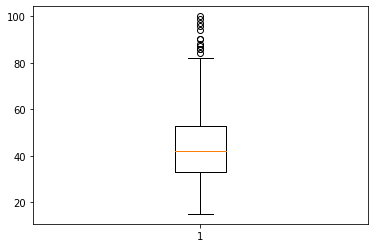

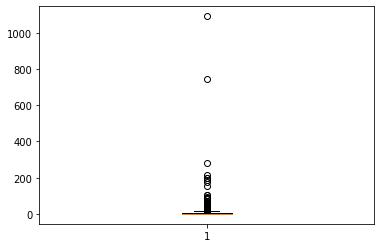

In [56]:
for feature in continue_numeric :
    plt.boxplot(data[feature])
    plt.show()